In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as ss

In [2]:
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', None)

In [3]:
# #get rid of scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Sound check

In [4]:
# sound check
# do a quick check for sound
# data_exp_24884-v5_task-qgn4.csv
sound = pd.read_csv('data_exp_26457-v3_task-qgn4.csv', sep = ",")
sound = sound.replace('null', np.nan)
sound = sound.replace('nan', np.nan)

In [5]:
sound = sound[np.isfinite(sound['button pressed'])]

In [6]:
correct = [1, 0, 0]* 30

In [7]:
s = (sound['button pressed'] == correct).reset_index(name = 'check')
sound = sound.reset_index()
sound = pd.merge(s[['index', 'check']], sound, on = 'index')
sound_final= sound[['Participant Private ID','button pressed','check']]

In [8]:
sound_final

,Participant Private ID,button pressed,check
0,2002775.000,1.000,True
1,2002775.000,1.000,False
2,2002775.000,0.000,True
3,2002789.000,1.000,True
4,2002789.000,0.000,True
5,2002789.000,0.000,True
6,2002817.000,1.000,True
7,2002817.000,0.000,True
8,2002817.000,0.000,True
9,2002821.000,1.000,True


# Fish

In [9]:
# import file
data = pd.read_csv('data_pos_01_latency_backfilled_happiness.csv', sep = ",")
# data_2 = pd.read_csv("pilot_2/data_exp_24005-v8_task-lhx6.csv", sep = ",")


In [10]:
# data = data[~data.Subject.isin([1991118.000, 1991119.000,1991143.000, 1991165.000, 1991117.000])] # incomplete data
data = data[~data.Subject.isin([2002863, 2002843, 2002820, 2002832])] # incomplete data



In [11]:
fish = data[(data.task == "fishing_pos")|(data.task == "fishing_neg")]


In [12]:
fish.environment.unique()

array(['pre_mood', 'post_mood'], dtype=object)

In [13]:
fish.Subject.nunique()

26

In [14]:
fish.latency.isnull().values.any()
fish = fish[fish.latency.notnull()]

# graph

In [15]:
mood_graph_pre = fish[(fish.environment == "pre_mood")]


In [16]:
# mood graph
mood_graph_post = fish[(fish.environment == "post_mood")]
g = mood_graph_post.groupby(["environment","mood","price_displayed"])['latency'].mean().reset_index()


In [17]:
g

,environment,mood,price_displayed,latency
0,post_mood,pos,0.100,157.370
1,post_mood,pos,0.400,155.967
2,post_mood,pos,1.000,155.882
3,post_mood,pos,2.500,155.127


In [18]:
price = [0.1, 0.6,2.5, 6.0]
# latency_p = g.latency[(g.mood == 'pos')]
# latency_n = g.latency[(g.mood == 'neg')]

In [19]:
data.Subject.nunique()

26

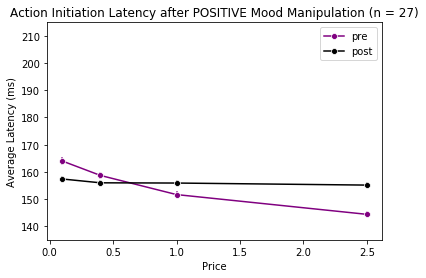

In [20]:
# plt.plot( price,  latency_pre_n, marker='', color='purple', linewidth=2, label = "pre-mood")
# plt.plot( price, latency_n, marker='', color='black', linewidth=2, linestyle='dashed', label="post-mood")

sns.lineplot("price_displayed", "latency", marker='o', color='purple', data = mood_graph_pre,label = "pre", err_style='bars')
sns.lineplot("price_displayed", "latency", marker='o', color='black', data = mood_graph_post,label = "post", err_style='bars')


plt.title("Action Initiation Latency after POSITIVE Mood Manipulation (n = 27)")
plt.xlabel("Price")
plt.ylabel("Average Latency (ms)")
plt.legend()
plt.ylim([135, 215])
plt.savefig('win_1_average_latency.png', transparent=True, dpi=300)


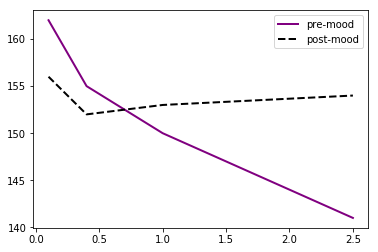

In [88]:
latency_pre_n = mood_graph_pre.groupby(["price_displayed"])["latency"].median()
latency_n = mood_graph_post.groupby(["price_displayed"])["latency"].median()
price = [0.1, 0.4, 1, 2.5]
plt.plot( price,  latency_pre_n, marker='', color='purple', linewidth=2, label = "pre-mood")
plt.plot( price, latency_n, marker='', color='black', linewidth=2, linestyle='dashed', label="post-mood")

plt.legend()



# Rating

In [21]:
# response
rating = data[(data.task == "mood_rating_pos")|(data.task == "mood_rating_neg")]


In [22]:
rating["index"]=[1]*len(rating)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
i = rating.groupby(["Subject", "environment"])["index"].cumsum().reset_index(name = "index")
rating = pd.merge(rating, i, left_on=rating.index, right_on = "level_0", how = "inner")
# rating.head()

In [24]:
rating.drop(["index_x", "level_0"], axis = 1, inplace = True)

In [25]:
rating["mood"] = rating["task"].map({"mood_rating_pos":"pos",
                                    "mood_rating_neg":"neg"})

In [26]:
rating["name"] = rating["Subject"].astype(int).astype(str) + " " + rating["mood"]


In [27]:
# 1991118.000, 1991119.000,1991143.000, 1991165.000, 1991117.000 

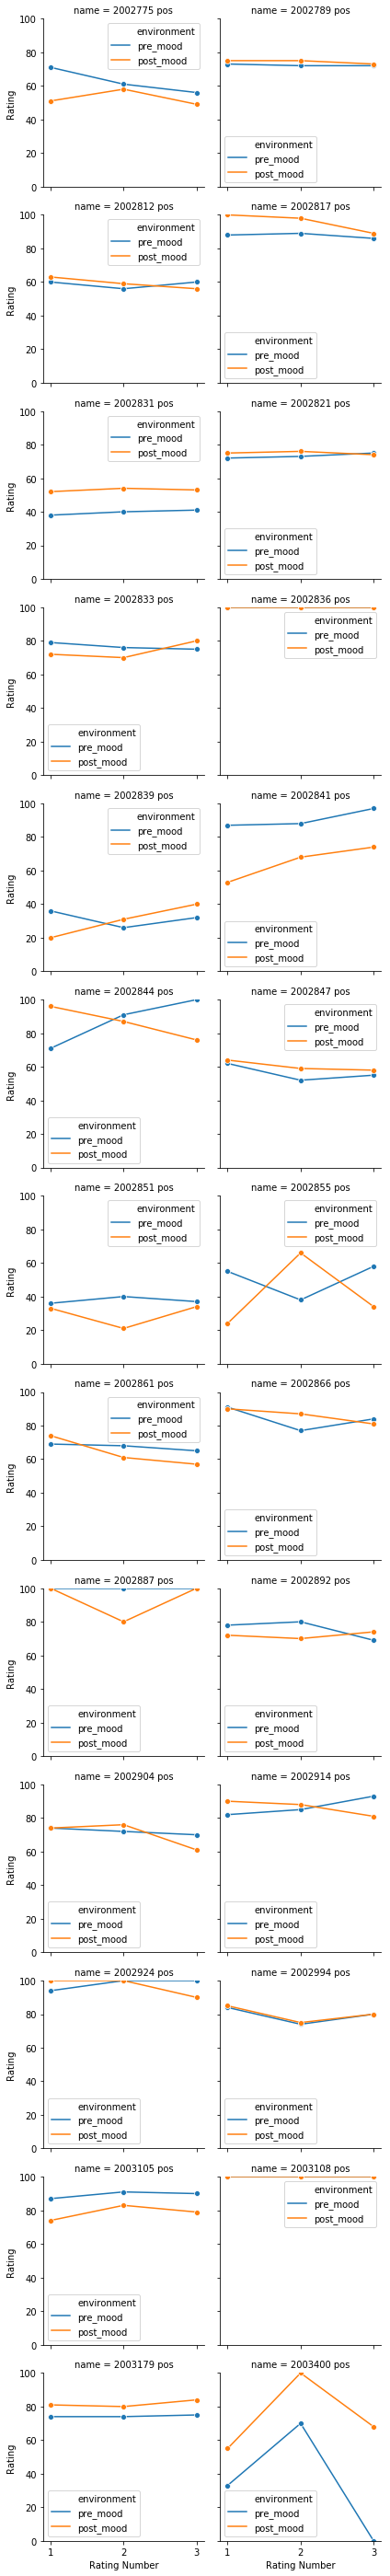

In [28]:
r = sns.FacetGrid(rating, col="name", col_wrap=2, height=3, ylim=(0, 100))
r.map(sns.lineplot, "index_y", "response", "environment", marker="o")
for ax in r.axes.ravel():
    ax.legend()
    ax.set_ylabel("Rating")
    ax.set_xlabel("Rating Number")
    
# plt.xlabel("Rating Number")
# plt.ylabel("Rating Number")
plt.xticks([1, 2, 3])
plt.savefig("rating_by_subject_pos_win_1.png", transparent=True, dpi=300)
# g = sns.FacetGrid(plot, col="id", col_wrap=4, height=2, ylim=(50, 300))
# g.map(sns.lineplot,'price_displayed','average_latency', 'environment', palette = "GnBu_d", legend = 'full',
#       err_style="bars")



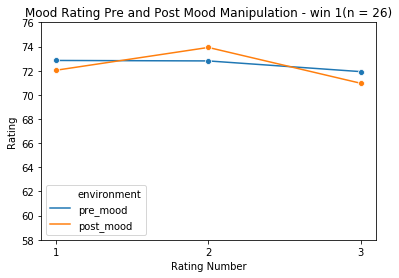

In [29]:
sns.lineplot("index_y", "response", "environment", markers=True, ci = None,marker = "o", data = rating)
plt.xlabel("Rating Number")
plt.ylabel("Rating")
plt.xticks([1, 2, 3])
plt.ylim([58, 76])
plt.title("Mood Rating Pre and Post Mood Manipulation - win 1(n = 26)")
plt.savefig("no wof mood raitng v2", dpi = 300, transparent = True)


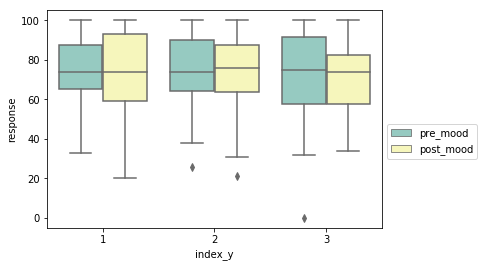

In [55]:
ax = sns.boxplot(x="index_y", y="response", hue="environment",
                 data=rating, palette="Set3")
ax.legend(loc = 1, bbox_to_anchor = (1.3, 0.5))
plt.savefig("rating_boxplot.png", dpi = 300, transparent = True, bbox_inches='tight')

In [56]:
mean_rating = rating[rating.environment == "pre_mood"].groupby("Subject").response.mean().reset_index(name = "mean")
std_rating = rating[rating.environment == "pre_mood"].groupby("Subject").response.std().reset_index(name = "std")



In [57]:
stats_pre = pd.merge(mean_rating, std_rating, on = 'Subject', how = "outer")



In [58]:
rating_post = rating[rating.environment == "post_mood"]

In [59]:
rating_post = rating_post.sort_values(by = "Subject")
stats_pre = stats_pre.sort_values(by = "Subject")

In [60]:
c = 0
z_scored = []
for s in stats_pre.Subject:
    subject = rating_post[rating_post.Subject == s]
    mean = stats_pre[stats_pre.Subject == s]["mean"][c]
    std = stats_pre[stats_pre.Subject == s]["std"][c]
    series = (subject.response - mean)/std
    z_scored.extend(series)
    c = c + 1


In [61]:
rating_post["z_scored"] = z_scored

In [62]:
# rating_post
#1932474.000 # rated all 100
#1932604.000 # rated all 100 expect for the one after mood manipulation for a 95

In [63]:
# b = sns.FacetGrid(rating, col="mood", col_order=["pos", "neg"])
# b = b.map(sns.lineplot, "index_y", "response","environment", markers=True, ci = None)
# plt.legend(loc='upper center', bbox_to_anchor=(1.45, 1), shadow=True)
# axes = b.axes.flatten()
# axes[0].set_title("mood = pos (n = 13)")
# axes[1].set_title("mood = neg (n = 16)")
    
# plt.savefig("average_rating_29.png", transparent = True, dpi = 300, bbox_inches='tight')

In [64]:
# b = sns.FacetGrid(rating[rating.Subject != 1912556], col="mood", col_order=["pos", "neg"])
# b = b.map(sns.lineplot, "index_y", "response","environment", markers=True, ci = None)
# plt.legend(loc='upper center', bbox_to_anchor=(1.45, 1), shadow=True)
# axes = b.axes.flatten()
# axes[0].set_title("mood = pos (n = 12)")
# axes[1].set_title("mood = neg (n = 16)")
    
# plt.savefig("average_rating_28.png", transparent = True, dpi = 300, bbox_inches='tight')


# by subject plot

In [65]:
fish.head(1)
# fish["title"] = fish["Subject"].astype(str) + " " + fish["mood"]

,Unnamed: 0,index,Subject,UTC Timestamp,key pressed,price_displayed,environment,task,function id,builtin rt,end_time,start_time,response,round_instance,trial_label,environment_binary,mood,latency
0,5,5,2002775.000,1600967037997.000,40.000,0.400,pre_mood,fishing_pos,fishing_pos,67.400,1600967036906.000,1600967036838.000,71.000,1.000,pre_mood 1.0,0,pos,174.000


In [66]:
sum_rating = rating.groupby(["Subject", "environment"])["response"].mean().reset_index(name = "avg_rating")

In [67]:
sum_rating["diff"] = sum_rating.groupby("Subject")["avg_rating"].diff(periods=-1)

In [68]:
sum_rating = sum_rating.dropna()

In [69]:
sum_rating

,Subject,environment,avg_rating,diff
0,2002775.000,post_mood,52.667,-10.000
2,2002789.000,post_mood,74.333,2.000
4,2002812.000,post_mood,59.333,0.667
6,2002817.000,post_mood,95.667,8.000
8,2002821.000,post_mood,75.000,1.667
10,2002831.000,post_mood,53.000,13.333
12,2002832.000,post_mood,100.000,19.000
14,2002833.000,post_mood,74.000,-2.667
16,2002836.000,post_mood,100.000,0.000
18,2002839.000,post_mood,30.333,-1.000


In [70]:
fish = fish.merge(sum_rating[["Subject", "diff"]], on = "Subject", how = "left")

In [71]:
fish = fish.sort_values(by = "diff")

In [72]:
fish["title"] = fish["Subject"].astype(str) + " post-pre: " + fish["diff"].round(2).astype(str)

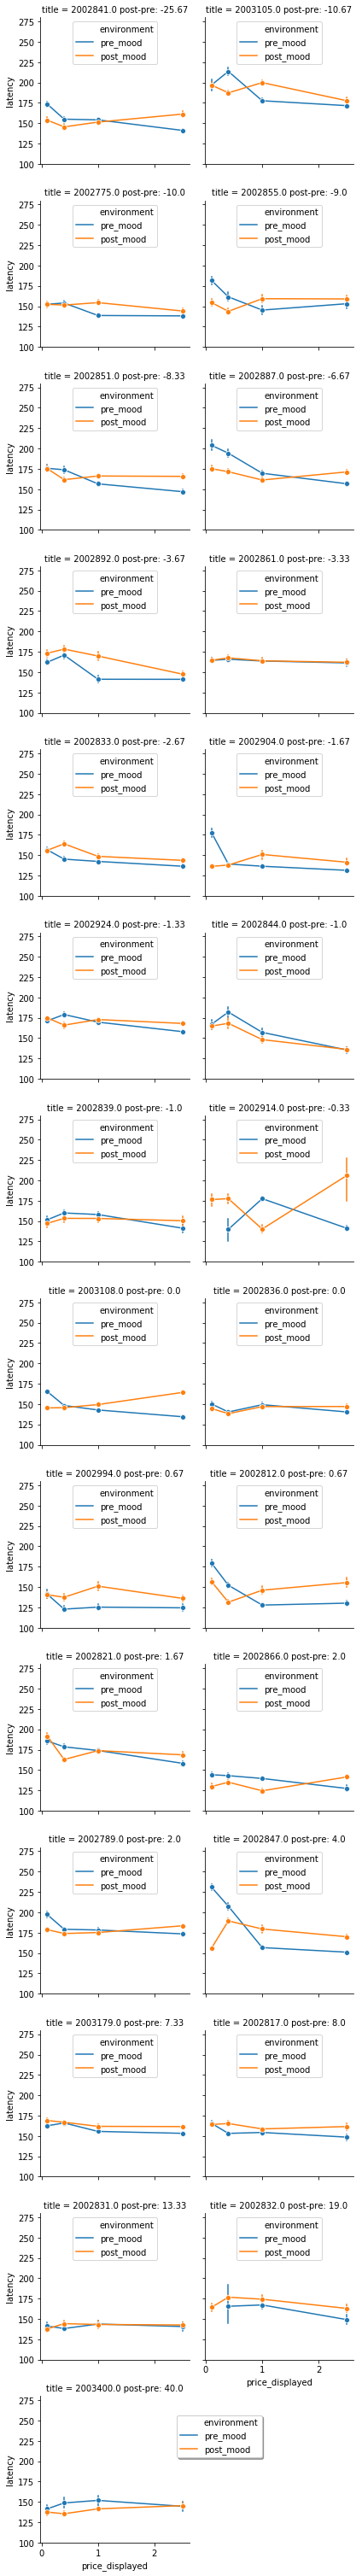

In [74]:
r = sns.FacetGrid(fish, col="title", col_wrap=2, height=3, ylim = ([100, 280]))
r.map(sns.lineplot, "price_displayed", "latency", "environment", marker="o", err_style='bars', hue_order = ["pre_mood", "post_mood"])
for ax in r.axes.ravel():
    ax.legend(loc='upper center')
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 0.9), shadow=True)
plt.savefig("latency_by_subject_ordered_pos_v2.png", transparent=True, dpi=300, bbox_inches='tight')
plt.show()

In [75]:
fish[fish.Subject == 2002832].groupby("environment").price_displayed.unique()

environment
post_mood    [2.5, 0.4, 1.0, 0.1]
pre_mood          [2.5, 0.4, 1.0]
Name: price_displayed, dtype: object

# tap difference

In [85]:
tap = fish.groupby(["Subject", "environment"]).size().reset_index(name = "tap")

In [86]:
t = tap.groupby("Subject").tap.diff(periods = -1)

In [87]:
tap["tap_diff"] = t

In [88]:
tap = tap.dropna()

In [89]:
rating_tap_diff = pd.merge(sum_rating, tap[["Subject", "tap_diff"]], on = "Subject")

In [90]:
ss.spearmanr(rating_tap_diff["diff"], rating_tap_diff["tap_diff"])

SpearmanrResult(correlation=0.20086261384893134, pvalue=0.29611818368126896)

## Robb's version

In [119]:
# rating_post
#1932474.000 # rated all 100
#1932604.000 # rated all 100 expect for the one after mood manipulation for a 95
rating_post = rating_post[~rating_post.Subject.isin([1932474.000, 1932604.000])]
tap = tap[~tap.Subject.isin([1932474.000, 1932604.000])]


In [128]:
m = rating_post.groupby("Subject").z_scored.mean().reset_index(name = 'm_zscored')
tap = pd.merge(tap, m, on = "Subject", how = "outer")

In [133]:
ss.spearmanr(tap["tap_diff"], tap["m_zscored"])

SpearmanrResult(correlation=0.16153321006257568, pvalue=0.4115341340777794)

# Mood change and HPS

In [137]:
hps = pd.read_csv("/Users/SophieS/Desktop/hps_neg.csv")

In [138]:
hps = hps.merge(tap, on = "Subject")

In [143]:
hps

,Unnamed: 0,Subject,score,environment,tap,tap_diff,m_zscored
0,0,1932451.000,2.500,post_mood,694,91.000,-2.127
1,1,1932455.000,3.417,post_mood,781,-21.000,-2.598
2,2,1932457.000,2.917,post_mood,735,27.000,-1.574
3,3,1932462.000,2.167,post_mood,693,-9.000,0.555
4,4,1932463.000,1.750,post_mood,771,20.000,1.601
5,6,1932490.000,3.333,post_mood,688,-14.000,-1.994
6,7,1932493.000,1.667,post_mood,731,-13.000,-5.000
7,8,1932507.000,3.083,post_mood,616,-75.000,-4.500
8,9,1932509.000,3.083,post_mood,778,11.000,0.218
9,10,1932510.000,3.250,post_mood,655,-56.000,-1.763


In [139]:
ss.spearmanr(hps["score"], hps["m_zscored"])

SpearmanrResult(correlation=-0.1624213092825628, pvalue=0.4089330500027326)

In [140]:
ss.pearsonr(hps["score"], hps["tap_diff"])

(0.22554703570879175, 0.24849396729132572)

In [ ]:
# z-scored post ratings 

# median latency between high and low

In [82]:
fish.Subject.nunique()

30

In [83]:
m = fish.groupby(["Subject", "price_displayed"])["latency"].median().reset_index(name = "median")

In [84]:
m = m[m.price_displayed.isin([0.1, 2.5])]

In [85]:
diff = m.groupby(["Subject"], as_index = True)["median"].diff().shift(-1)

In [86]:
m["diff"] = diff

In [87]:
m = m.dropna()

In [88]:
np.median(m["diff"]*(-1))

9.0

In [89]:
# only pre-mood

In [90]:
m_pre_mood = fish[fish.environment == "pre_mood"]

In [91]:
m_pre_mood = m_pre_mood.groupby(["Subject", "price_displayed"])["latency"].median().reset_index(name = "median")

In [92]:
m_pre_mood = m_pre_mood[m_pre_mood.price_displayed.isin([0.1, 2.5])]

In [93]:
diff_pre_mood = m_pre_mood.groupby(["Subject"], as_index = True)["median"].diff().shift(-1)

In [94]:
m_pre_mood["diff"] = diff_pre_mood

In [95]:
m_pre_mood = m_pre_mood.dropna()

In [96]:
np.median(m_pre_mood["diff"]*(-1))

11.5

In [97]:
f_1 = fish[fish.trial_label.isin(['pre_mood 1.0',
                                 'pre_mood 2.0',
                                 'pre_mood 3.0',
                                 'pre_mood 4.0'])]



In [98]:
f_2 = fish[fish.trial_label.isin(['pre_mood 5.0',
                                 'pre_mood 6.0',
                                 'pre_mood 7.0',
                                 'pre_mood 8.0'])]

In [99]:
m_pre_mood_1 = f_1.groupby(["Subject", "price_displayed"])["latency"].median().reset_index(name = "median")
m_pre_mood_1 = m_pre_mood_1[m_pre_mood_1.price_displayed.isin([0.1, 6])]
diff_pre_mood_1 = m_pre_mood_1.groupby(["Subject"], as_index = True)["median"].diff().shift(-1)
m_pre_mood_1["diff"] = diff_pre_mood_1
m_pre_mood_1 = m_pre_mood_1.dropna()
np.median(m_pre_mood_1["diff"]*(-1))


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

In [129]:
m_pre_mood_2 = f_2.groupby(["Subject", "price_displayed"])["latency"].median().reset_index(name = "median")
m_pre_mood_2 = m_pre_mood_2[m_pre_mood_2.price_displayed.isin([0.1, 6])]
diff_pre_mood_2 = m_pre_mood_2.groupby(["Subject"], as_index = True)["median"].diff().shift(-1)
m_pre_mood_2["diff"] = diff_pre_mood_2
m_pre_mood_2 = m_pre_mood_2.dropna()
np.median(m_pre_mood_2["diff"]*(-1))


27.5

In [130]:
from scipy import stats as ss

In [131]:
ss.ttest_rel(m_pre_mood_2["diff"], m_pre_mood_1["diff"])

Ttest_relResult(statistic=0.5036211665131262, pvalue=0.6184670833033181)

In [101]:
# post-mood overall

In [110]:
m_post_mood = fish[fish.environment == "post_mood"]

In [111]:
m_post_mood.shape

(19940, 17)

In [112]:
m_post_mood = m_post_mood.groupby(["Subject","price_displayed"])["latency"].median().reset_index(name = "median")
m_post_mood = m_post_mood[m_post_mood.price_displayed.isin([0.1, 2.5])]
diff_post_mood = m_post_mood.groupby(["Subject"], as_index = True)["median"].diff().shift(-1)
m_post_mood["diff"] = diff_post_mood
m_post_mood = m_post_mood.dropna()
np.median(m_post_mood["diff"]*(-1))

0.5

In [182]:
# post-mood positive

In [193]:
m_pos = fish[(fish.mood == "pos")&(fish.environment == "post_mood")]

In [194]:
m_pos = m_pos.groupby(["Subject", "price_displayed"])["latency"].median().reset_index(name = "median")

In [195]:
m_pos= m_pos[m_pos.price_displayed.isin([0.1, 6])]

In [196]:
diff_pos_mood = m_pos.groupby(["Subject"], as_index = True)["median"].diff().shift(-1)

In [197]:
m_pos["diff"] = diff_pos_mood

In [198]:
m_pos = m_pos.dropna()

In [199]:
np.median(m_pos ["diff"]*(-1))

1.0

In [202]:
m_post_mood = fish[fish.environment == "post_mood"]

In [203]:
m_neg = m_post_mood[m_post_mood.mood == "neg"]

In [204]:
m_neg = m_neg.groupby(["Subject", "price_displayed"])["latency"].median().reset_index(name = "median")

In [205]:
m_neg= m_neg[m_neg.price_displayed.isin([0.1, 6])]

In [206]:
diff_neg_mood = m_neg.groupby(["Subject"], as_index = True)["median"].diff().shift(-1)

In [207]:
m_neg["diff"] = diff_neg_mood

In [208]:
m_neg = m_neg.dropna()

In [209]:
np.median(m_neg ["diff"]*(-1))

0.5

# Log Linear Mixed Model

In [38]:
from statsmodels.formula.api import mixedlm

In [39]:
# calculate fatigue
fish["tap_count"] = [1] * len(fish)
tap_count = fish.groupby(['Subject', 'trial_label'])['tap_count'].cumsum().reset_index(name = "fatigue")
tap_count = tap_count.reset_index().set_index("index")
tap_count = tap_count.drop("level_0", axis = 1)

In [40]:
fish = tap_count.merge(fish, left_index = True, right_index = True, how = "inner")

In [41]:
fish["log_latency"] = np.log(fish["latency"])

In [42]:
fish.environment_binary.unique()

array([0, 1])

In [43]:
fish.price_displayed.unique()

array([2.5, 1. , 0.1, 0.4])

In [45]:
fish.latency.isnull().values.any()
fish = fish[fish.latency.notnull()]

In [46]:
fish.head(1)

,fatigue,Subject,UTC Timestamp,key pressed,price_displayed,environment,task,function id,builtin rt,end_time,start_time,response,round_instance,trial_label,environment_binary,latency,mood,tap_count,log_latency
5,1,1932451.000,1599581939262.000,40.000,2.500,pre_mood,fishing_neg,fishing_neg,184.950,1599581938854.000,1599581938668,nan,1.000,pre_mood 1.0,0,289.000,neg,1,5.666


In [47]:
fish_pre = fish[fish.environment == "pre_mood"]
fish_post = fish[fish.environment == "post_mood"]


In [104]:
f_model = mixedlm(formula = "log_latency ~ 1 + environment_binary + price_displayed + fatigue",
                 groups = fish["Subject"],
                 re_formula = "~ environment_binary + price_displayed + fatigue", data = fish)
r = f_model.fit(reml = False, method = "powell")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2094: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [105]:
print (r.summary())

                       Mixed Linear Model Regression Results
Model:                      MixedLM         Dependent Variable:         log_latency
No. Observations:           39451           Method:                     ML         
No. Groups:                 30              Scale:                      0.0574     
Min. group size:            23              Likelihood:                 144.2077   
Max. group size:            1713            Converged:                  Yes        
Mean group size:            1315.0                                                 
-----------------------------------------------------------------------------------
                                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------------
Intercept                                 5.216    0.058 89.493 0.000  5.102  5.330
environment_binary                       -0.006    0.014 -0.450 0.653 -0.034  0.021
price_displayed

In [109]:
r_params = pd.DataFrame(r.params, columns = ["LMM"])
random_effects = pd.DataFrame(r.random_effects)
random_effects = random_effects.transpose()
random_effects = random_effects.rename(index = str, columns = {"group":"LMM"})

In [111]:
f_pre = mixedlm(formula = "log_latency ~ 1 + price_displayed + fatigue",
                 groups = fish_pre["Subject"],
                 re_formula = "~ price_displayed + fatigue", data = fish_pre)
r_pre = f_pre.fit(reml = False, method = "powell")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2094: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [112]:
print (r_pre.summary())

                 Mixed Linear Model Regression Results
Model:                 MixedLM      Dependent Variable:      log_latency
No. Observations:      19870        Method:                  ML         
No. Groups:            30           Scale:                   0.0541     
Min. group size:       12           Likelihood:              601.7692   
Max. group size:       855          Converged:               Yes        
Mean group size:       662.3                                            
------------------------------------------------------------------------
                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                      5.246    0.064 81.917 0.000  5.121  5.372
price_displayed               -0.053    0.014 -3.703 0.000 -0.081 -0.025
fatigue                       -0.001    0.000 -2.962 0.003 -0.002 -0.000
Group Var                      0.122    0.146                        

In [114]:
f_post = mixedlm(formula = "log_latency ~ 1 + environment + price_displayed + fatigue",
                 groups = fish_post["Subject"],
                 re_formula = "~ environment + price_displayed + fatigue", data = fish_post)
r_post = f_post.fit(reml = False, method = "powell")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2094: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [115]:
print (r_post.summary())

                  Mixed Linear Model Regression Results
Model:                  MixedLM      Dependent Variable:      log_latency
No. Observations:       19581        Method:                  ML         
No. Groups:             30           Scale:                   0.0572     
Min. group size:        11           Likelihood:              66.1158    
Max. group size:        858          Converged:               Yes        
Mean group size:        652.7                                            
-------------------------------------------------------------------------
                              Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                      5.176    0.044 118.507 0.000  5.090  5.261
price_displayed                0.006    0.011   0.527 0.598 -0.015  0.026
fatigue                       -0.002    0.001  -2.749 0.006 -0.003 -0.000
Group Var                      0.057    0.067           

In [48]:
f_pre_avg = fish_pre.groupby("Subject")["latency"].mean().reset_index(name = "avg_across")
f_post_avg = fish_post.groupby("Subject")["latency"].mean().reset_index(name = "avg_across")
                                                                      

In [49]:
ss.wilcoxon(f_pre_avg.avg_across, f_post_avg.avg_across)

WilcoxonResult(statistic=199.0, pvalue=0.49079849348995086)

In [56]:
f_pre_avg = fish_pre.groupby("Subject")["latency"].median().reset_index(name = "avg_across_pre")
f_post_avg = fish_post.groupby("Subject")["latency"].median().reset_index(name = "avg_across_post")
                                                                      

In [58]:
ss.wilcoxon(f_pre_avg.avg_across_pre, f_post_avg.avg_across_post)

WilcoxonResult(statistic=188.5, pvalue=0.36509377246560404)

In [59]:
medians = f_pre_avg.merge(f_post_avg, on = "Subject")

In [60]:
medians.shape

(30, 3)

In [63]:
m = medians[medians.Subject != 1932550]

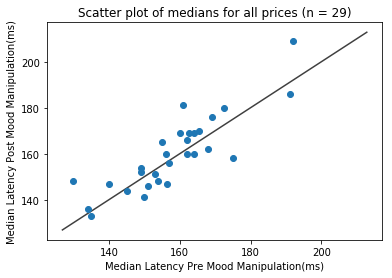

In [74]:
plt.scatter(m["avg_across_pre"], m["avg_across_post"])
plt.xlabel("Median Latency Pre Mood Manipulation(ms)")
plt.ylabel("Median Latency Post Mood Manipulation(ms)")

lims = [
    np.min([plt.gca().get_xlim(), plt.gca().get_ylim()]),  # min of both axes
    np.max([plt.gca().get_xlim(), plt.gca().get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
plt.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.title("Scatter plot of medians for all prices (n = 29)")
plt.savefig("scatter plot medians.png", dpi = 300, transparent = True)

In [76]:
ss.wilcoxon(m["avg_across_pre"], m["avg_across_post"])

WilcoxonResult(statistic=158.5, pvalue=0.20165471306805094)